# DataQuest Guided Project (DataQuest mission/tag #201)
---
## Star Wars Survey: Does America Realize That “The Empire Strikes Back” Is The Best Movie Of The Franchise?

The data was collected by FiveThirtyEight and is available on their [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) page.
FiveThirtyEight asked people the following:
* Which Star Wars movie they saw
* Opinions on various characters (multiple choice from Very Unfavorable to Very Favorable
* Ranks for each movie, whether they saw one movie or all of them (Potential flaw with survey design here)
* Whether they consideted themselves to be a fan of Star Wars, Star Trek, or Expanded Universe
* Demographic data such as age, gender, education level, income level, and location
* "Who Shot First?" which seems like a reference that fans would have a greater chance at understanding than non-fans. There is already a column to indicate whether someone is a fan or not

1,186 responses were collected.  I will analyze this data here to see what insights we can generate about these movies

## Navigation
[Imports, Read File, and Preview](#Imports,-Read-File,-and-Preview)

[Cleanup Column Headers](#Header-Cleanup)

[Data Conversions: Strings to Booleans and Numeric](#Data-Conversions:-Strings-to-Booleans-and-Numeric)

[Data Conversions: Remove Movie Rankings for Movies Not Watched](#Data-Conversions:-Remove-Movie-Rankings-for-Movies-Not-Watched)

[Analyze Overall Rankings and Number of Viewers](#Analyze-Overall-Rankings-and-Number-of-Viewers)

[Create Subsets of Data for a More Granular Analysis](#Create-Subsets-of-Data-for-a-More-Granular-Analysis)

[Create a Function to Reuse Analysis Code](#Create-a-Function-to-Reuse-Analysis-Code)

[Analyze Star Wars fans and non-fans](#Analyze-Star-Wars-fans-and-non-fans)

[Analyze Star Trek fans and non-fans](#Analyze-Star-Trek-fans-and-non-fans)

[Analyze Males and Females](#Analyze-Males-and-Females)

[Analyze by Age](#Analyze-by-Age)

[Analyze by Income Level](#Analyze-by-Income-Level)

[Appendix: Evidence of Poor Survey Design?](#Appendix)

## Imports, Read File, and Preview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read file
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1', header=None)

In [3]:
#preview dataframe
star_wars.head(5)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,RespondentID,Have you seen any of the 6 films in the Star W...,Do you consider yourself to be a fan of the St...,Which of the following Star Wars films have yo...,NaN,NaN,NaN,NaN,NaN,Please rank the Star Wars films in order of pr...,...,NaN,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Ex...,Do you consider yourself to be a fan of the St...,Gender,Age,Household Income,Education,Location (Census Region)
1,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
2,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


[To Navigation Menu](#Navigation)

## Header Cleanup

First 2 rows are headers, this is why it's a good idea to combine them into one

In [4]:
#loop through the first header column, replace blanks with values from previous filled cell
first_header_row = star_wars.iloc[0]

for n, i in enumerate(first_header_row):
    if pd.isnull(i):
        first_header_row[n] = first_header_row[n-1]

In [5]:
second_header_row = star_wars.iloc[1]
#replace nan in second header row with 'Response' following convention of the file
second_header_row[0] = 'Response'

In [6]:
#combine header rows into one, separated with a dash
headers = first_header_row + '-' + second_header_row

In [7]:
#make headers less wordy
headers = headers.str.replace('-Response', '')
headers = headers.str.replace('Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.-Star Wars: ', 'Rank-')
headers = headers.str.replace('Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.-', 'Opinion-')
headers = headers.str.replace('Do you consider yourself to be a fan', 'Fan')
headers = headers.str.replace('Which of the following Star Wars films have you seen? Please select all that apply.-Star Wars: ', 'Seen ', regex=False)

In [8]:
#view updated headers - looks better
for i in headers:
    print(i)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Fan of the Star Wars film franchise?
Seen Episode I  The Phantom Menace
Seen Episode II  Attack of the Clones
Seen Episode III  Revenge of the Sith
Seen Episode IV  A New Hope
Seen Episode V The Empire Strikes Back
Seen Episode VI Return of the Jedi
Rank-Episode I  The Phantom Menace
Rank-Episode II  Attack of the Clones
Rank-Episode III  Revenge of the Sith
Rank-Episode IV  A New Hope
Rank-Episode V The Empire Strikes Back
Rank-Episode VI Return of the Jedi
Opinion-Han Solo
Opinion-Luke Skywalker
Opinion-Princess Leia Organa
Opinion-Anakin Skywalker
Opinion-Obi Wan Kenobi
Opinion-Emperor Palpatine
Opinion-Darth Vader
Opinion-Lando Calrissian
Opinion-Boba Fett
Opinion-C-3P0
Opinion-R2 D2
Opinion-Jar Jar Binks
Opinion-Padme Amidala
Opinion-Yoda
Which character shot first?
Are you familiar with the Expanded Universe?
Fan of the Expanded Universe???
Fan of the Star Trek franchise?
Gender
Age
Household Income
Educati

In [9]:
#assign new column headers
star_wars.columns = headers

In [10]:
#delete first two rows
star_wars.drop([0, 1], axis=0, inplace=True)

In [11]:
#check to make sure the new header is in place
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Fan of the Star Wars film franchise?,Seen Episode I The Phantom Menace,Seen Episode II Attack of the Clones,Seen Episode III Revenge of the Sith,Seen Episode IV A New Hope,Seen Episode V The Empire Strikes Back,Seen Episode VI Return of the Jedi,Rank-Episode I The Phantom Menace,...,Opinion-Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Fan of the Expanded Universe???,Fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
2,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


[To Navigation Menu](#Navigation)

## Data Conversions: Strings to Booleans and Numeric

In [12]:
#check for any NaNs in RespondentID column
any(star_wars['RespondentID'].isnull())

False

In [13]:
#convert some columns to boolean
convert_to_bool = {'No': False, 
                   np.nan: False,
                   'Yes': True,
                   'Star Wars: Episode I  The Phantom Menace': True,
                   'Star Wars: Episode II  Attack of the Clones': True,
                   'Star Wars: Episode III  Revenge of the Sith': True,
                   'Star Wars: Episode IV  A New Hope': True,
                   'Star Wars: Episode V The Empire Strikes Back': True,
                   'Star Wars: Episode VI Return of the Jedi': True
                  }
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(convert_to_bool)
star_wars['Fan of the Star Wars film franchise?'] = \
    star_wars['Fan of the Star Wars film franchise?'].map(convert_to_bool)
star_wars['Seen Episode I  The Phantom Menace'] = star_wars['Seen Episode I  The Phantom Menace'].map(convert_to_bool)
star_wars['Seen Episode II  Attack of the Clones'] = star_wars['Seen Episode II  Attack of the Clones'].map(convert_to_bool)
star_wars['Seen Episode III  Revenge of the Sith'] = star_wars['Seen Episode III  Revenge of the Sith'].map(convert_to_bool)
star_wars['Seen Episode IV  A New Hope'] = star_wars['Seen Episode IV  A New Hope'].map(convert_to_bool)
star_wars['Seen Episode V The Empire Strikes Back'] = star_wars['Seen Episode V The Empire Strikes Back'].map(convert_to_bool)
star_wars['Seen Episode VI Return of the Jedi'] = star_wars['Seen Episode VI Return of the Jedi'].map(convert_to_bool)

In [14]:
#this check shows that columns converted to bool data type with no missing values
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 2 to 1187
Data columns (total 38 columns):
RespondentID                                                    1186 non-null object
Have you seen any of the 6 films in the Star Wars franchise?    1186 non-null bool
Fan of the Star Wars film franchise?                            1186 non-null bool
Seen Episode I  The Phantom Menace                              1186 non-null bool
Seen Episode II  Attack of the Clones                           1186 non-null bool
Seen Episode III  Revenge of the Sith                           1186 non-null bool
Seen Episode IV  A New Hope                                     1186 non-null bool
Seen Episode V The Empire Strikes Back                          1186 non-null bool
Seen Episode VI Return of the Jedi                              1186 non-null bool
Rank-Episode I  The Phantom Menace                              835 non-null object
Rank-Episode II  Attack of the Clones                       

In [15]:
#convert ranking columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
#convert opinion columns to a numeric score on a scale from Very unfavorably = 0 to Very favorably = 4
convert_to_int = {'Very unfavorably': 0,
                  'Somewhat unfavorably': 1,
                  'Neither favorably nor unfavorably (neutral)': 2,
                  'Somewhat favorably': 3,
                  'Very favorably': 4,
                  'Unfamiliar (N/A)': np.nan}

opinion_columns = [col for col in star_wars.columns if col.startswith('Opinion')]

for col in opinion_columns:
    star_wars[col] = star_wars[col].map(convert_to_int)

In [17]:
#this check shows that opinion columns converted to numeric successfully
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 2 to 1187
Data columns (total 38 columns):
RespondentID                                                    1186 non-null object
Have you seen any of the 6 films in the Star Wars franchise?    1186 non-null bool
Fan of the Star Wars film franchise?                            1186 non-null bool
Seen Episode I  The Phantom Menace                              1186 non-null bool
Seen Episode II  Attack of the Clones                           1186 non-null bool
Seen Episode III  Revenge of the Sith                           1186 non-null bool
Seen Episode IV  A New Hope                                     1186 non-null bool
Seen Episode V The Empire Strikes Back                          1186 non-null bool
Seen Episode VI Return of the Jedi                              1186 non-null bool
Rank-Episode I  The Phantom Menace                              835 non-null float64
Rank-Episode II  Attack of the Clones                      

[To Navigation Menu](#Navigation)

## Data Conversions: Remove Movie Rankings for Movies Not Watched

#### After inspecting the data further, it appears that survey takers were able to rank the movies even without seeing them! You can see two examples of this below. It almost seems like rankings for episodes not seen are random or arbitrary, which is not good

In [18]:
star_wars[star_wars.columns[3:15]].iloc[2]

Seen Episode I  The Phantom Menace         True
Seen Episode II  Attack of the Clones      True
Seen Episode III  Revenge of the Sith      True
Seen Episode IV  A New Hope               False
Seen Episode V The Empire Strikes Back    False
Seen Episode VI Return of the Jedi        False
Rank-Episode I  The Phantom Menace            1
Rank-Episode II  Attack of the Clones         2
Rank-Episode III  Revenge of the Sith         3
Rank-Episode IV  A New Hope                   4
Rank-Episode V The Empire Strikes Back        5
Rank-Episode VI Return of the Jedi            6
Name: 4, dtype: object

In [19]:
star_wars[star_wars.columns[3:15]].iloc[173]

Seen Episode I  The Phantom Menace        False
Seen Episode II  Attack of the Clones     False
Seen Episode III  Revenge of the Sith     False
Seen Episode IV  A New Hope                True
Seen Episode V The Empire Strikes Back     True
Seen Episode VI Return of the Jedi         True
Rank-Episode I  The Phantom Menace            4
Rank-Episode II  Attack of the Clones         5
Rank-Episode III  Revenge of the Sith         6
Rank-Episode IV  A New Hope                   1
Rank-Episode V The Empire Strikes Back        3
Rank-Episode VI Return of the Jedi            2
Name: 175, dtype: object

#### I am not sure what the reason for this was but it seems like it would introduce a lot of noise into the data so I will replace rankings with NaNs where a movie was not actually seen. The survey probably should have been designed not to accept movie rankings for movies not seen. Prior to running this step I will create a copy of the full dataframe to use in the Appendix

In [20]:
star_wars_copy = star_wars.copy()

In [21]:
star_wars.loc[star_wars['Seen Episode I  The Phantom Menace'] == False, 'Rank-Episode I  The Phantom Menace'] = np.nan
star_wars.loc[star_wars['Seen Episode II  Attack of the Clones'] == False, 'Rank-Episode II  Attack of the Clones'] = np.nan
star_wars.loc[star_wars['Seen Episode III  Revenge of the Sith'] == False, 'Rank-Episode III  Revenge of the Sith'] = np.nan
star_wars.loc[star_wars['Seen Episode IV  A New Hope'] == False, 'Rank-Episode IV  A New Hope'] = np.nan
star_wars.loc[star_wars['Seen Episode V The Empire Strikes Back'] == False, 'Rank-Episode V The Empire Strikes Back'] = np.nan
star_wars.loc[star_wars['Seen Episode VI Return of the Jedi'] == False, 'Rank-Episode VI Return of the Jedi'] = np.nan

### Verify that movies not seen do not have a ranking

In [22]:
star_wars[star_wars.columns[3:15]].iloc[2]

Seen Episode I  The Phantom Menace         True
Seen Episode II  Attack of the Clones      True
Seen Episode III  Revenge of the Sith      True
Seen Episode IV  A New Hope               False
Seen Episode V The Empire Strikes Back    False
Seen Episode VI Return of the Jedi        False
Rank-Episode I  The Phantom Menace            1
Rank-Episode II  Attack of the Clones         2
Rank-Episode III  Revenge of the Sith         3
Rank-Episode IV  A New Hope                 NaN
Rank-Episode V The Empire Strikes Back      NaN
Rank-Episode VI Return of the Jedi          NaN
Name: 4, dtype: object

In [23]:
star_wars[star_wars.columns[3:15]].iloc[173]

Seen Episode I  The Phantom Menace        False
Seen Episode II  Attack of the Clones     False
Seen Episode III  Revenge of the Sith     False
Seen Episode IV  A New Hope                True
Seen Episode V The Empire Strikes Back     True
Seen Episode VI Return of the Jedi         True
Rank-Episode I  The Phantom Menace          NaN
Rank-Episode II  Attack of the Clones       NaN
Rank-Episode III  Revenge of the Sith       NaN
Rank-Episode IV  A New Hope                   1
Rank-Episode V The Empire Strikes Back        3
Rank-Episode VI Return of the Jedi            2
Name: 175, dtype: object

[To Navigation Menu](#Navigation)

## Analyze Overall Rankings and Number of Viewers

### Visualize Average Ranking of a Star Wars Film

In [24]:
avg_ranks = star_wars[star_wars.columns[9:15]].mean().round(2)

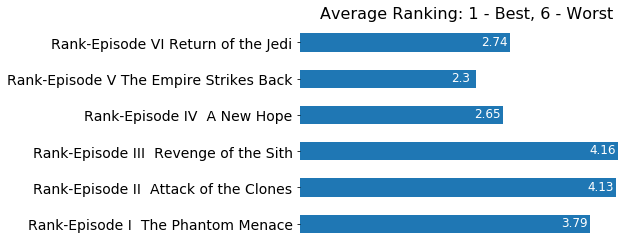

In [25]:
ax = avg_ranks.plot(kind='barh')
ax.set_title('Average Ranking: 1 - Best, 6 - Worst', {'fontsize': 16})
ax.set_yticklabels(avg_ranks.index, {'fontsize': 14})
ax.tick_params(axis='x', length=0, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

rects = ax.patches

for rect, rank in zip(rects, avg_ranks):    
    text_x_coord = rank - 0.2
    text_y_coord = rect.get_y() + 0.1    
    ax.text(text_x_coord, text_y_coord, rank, color='white', ha='center', va='bottom', fontsize=12)

We can see from our analysis that survey takers rank "Episode V: The Empire Strikes Back" the highest on average. If I remember correctly, that movie did not end well for the rebels, and thus generated a lot of hype in anticipation of Episode VI. My quick take on why the 3 movies that came out decades ago tend to be ranked higher:

* Novelty of special effects and space travel at the time
* The Space Program being featured more prominently in the mainstream media at the time
* Nostalgia for the 'good ol' days'
* Being spoiled by a wave of superhero movies in 2000s

Serious movie critics and pop culture historians probably have additional reasons, or may be in disagreement with me.

### Visualize the Number of People Who Watched Each Movie

In [26]:
sum_watchers = star_wars[star_wars.columns[3:9]].sum()

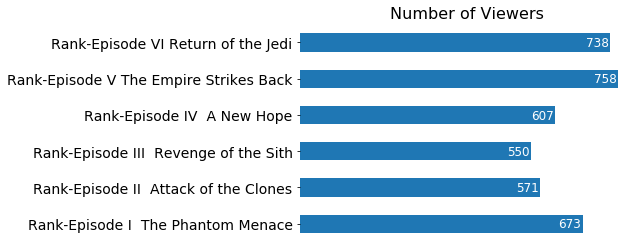

In [27]:
ax = sum_watchers.plot(kind='barh')
ax.set_title('Number of Viewers', {'fontsize': 16})
ax.set_yticklabels(avg_ranks.index, {'fontsize': 14})
ax.tick_params(axis='x', length=0, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

rects = ax.patches

for rect, rank in zip(rects, sum_watchers):    
    text_x_coord = rank - 30
    text_y_coord = rect.get_y() + 0.06
    ax.text(text_x_coord, text_y_coord, rank, color='white', ha='center', va='bottom', fontsize=12)

It appears that the number of people who saw each episode is negatively correlated with movie rankings. This makes sense as more people tend to watch movies that are ranked higher, and excitement drops off for movies that are ranked lower. We can easily calculate the correlation below. The result is -0.75. We can also use a scatterplot which is a better way to show correlation.

In [28]:
corr_df = pd.DataFrame(columns=['Ranks', 'Viewers'])
corr_df['Ranks'] = avg_ranks.values
corr_df['Viewers'] = sum_watchers.values

In [29]:
corr_df

,Ranks,Viewers
0,3.79,673
1,4.13,571
2,4.16,550
3,2.65,607
4,2.30,758
5,2.74,738


In [30]:
corr_df.corr()

,Ranks,Viewers
Ranks,1.00000,-0.74942
Viewers,-0.74942,1.00000


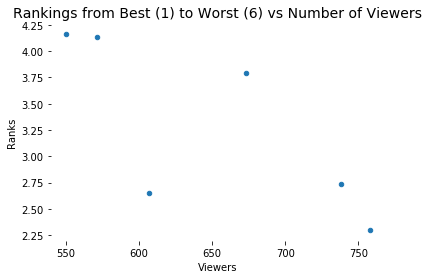

In [31]:
ax = corr_df.plot(kind='scatter', x='Viewers', y='Ranks')
ax.set_title('Rankings from Best (1) to Worst (6) vs Number of Viewers', {'fontsize': 14})
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### Visualize Average Opinion Score by Character

In [32]:
avg_opinion = star_wars[opinion_columns].mean().round(2)
avg_opinion.sort_values(ascending=False, inplace=True)
print(avg_opinion)

Opinion-Han Solo                3.67
Opinion-Yoda                    3.63
Opinion-Obi Wan Kenobi          3.63
Opinion-Luke Skywalker          3.58
Opinion-R2 D2                   3.57
Opinion-Princess Leia Organa    3.56
Opinion-C-3P0                   3.40
Opinion-Anakin Skywalker        2.78
Opinion-Lando Calrissian        2.64
Opinion-Padme Amidala           2.60
Opinion-Darth Vader             2.48
Opinion-Boba Fett               2.36
Opinion-Emperor Palpatine       2.07
Opinion-Jar Jar Binks           1.78
dtype: float64


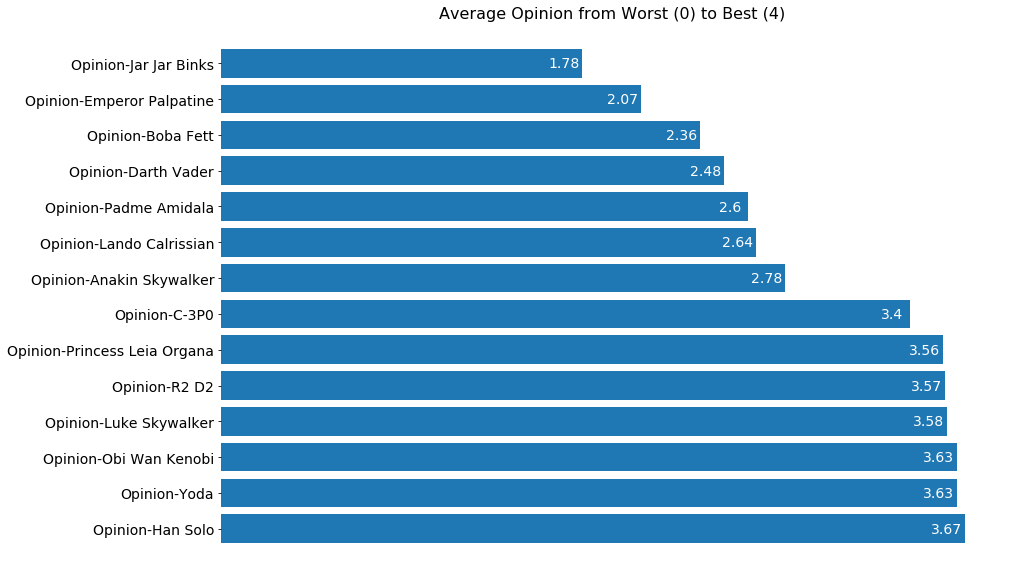

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

ax.barh(avg_opinion.index, avg_opinion)
ax.set_title('Average Opinion from Worst (0) to Best (4)', {'fontsize': 16})
ax.set_yticklabels(avg_opinion.index, {'fontsize': 14})
ax.tick_params(axis='x', length=0, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

rects = ax.patches

for rect, rank in zip(rects, avg_opinion):    
    text_x_coord = rank - 0.09
    text_y_coord = rect.get_y() + 0.2
    ax.text(text_x_coord, text_y_coord, rank, color='white', ha='center', va='bottom', fontsize=14) 
    
plt.show()

Interesting findings:
* Han Solo has a slightly higher opinion score than Yoda or Obi Wan!
* Jar Jar Binks has a lower opinion score than Emperor Palpatine!
* Emperor Palpatine's opinion is slightly better than Neutral (2).
* People seem to be most conflicted about Anakin, whose opinion score is in the middle of the total range

[To Navigation Menu](#Navigation)

## Create Subsets of Data for a More Granular Analysis

Create subsets of the full dataframe by filtering on columns. I am selective here and realize there are additional ways to filter data like geographic location or education level.

In [34]:
#Star Wars fan and non-fans
star_wars_fans = star_wars[star_wars['Fan of the Star Wars film franchise?'] == True]
non_star_wars_fans = star_wars[star_wars['Fan of the Star Wars film franchise?'] == False]
#Star Trek fans and non-fans
star_trek_fans = star_wars[star_wars['Fan of the Star Trek franchise?'] == 'Yes']
non_star_trek_fans = star_wars[star_wars['Fan of the Star Trek franchise?'] == 'No']
#Males and Females
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
#Young and Old
under_30 = star_wars[star_wars['Age'] == '18-29']
over_60 = star_wars[star_wars['Age'] == '> 60']
#income levels
under_25k = star_wars[star_wars['Household Income'] == '$0 - $24,999']
over_150k = star_wars[star_wars['Household Income'] == '$150,000+']

#arrange the dataframes we created into a dictionary
dataframes = {'Star Wars fans': star_wars_fans,
              'Non Star Wars fans': non_star_wars_fans,
              'Star Trek fans': star_trek_fans,
              'Non Star Trek fans': non_star_trek_fans,
              'Males': males,
              'Females': females,
              'Under 30 Years of Age': under_30,
              'Over 60 Years of Age': over_60,
              'Under $25,000 Income': under_25k,
              'Over $150,000 Income': over_150k}

[To Navigation Menu](#Navigation)

## Create a Function to Reuse Analysis Code

Create a function to make it easy to analyze any portion of the full dataframe. I created a number of subsets of the full dataframe by filtering on a number of columns, then arranged all of them in a dictionary above. This is just one way to do it, and there are ways to make graphs look prettier. I am sticking to matplotlib because I don't have authorization to install seaborn or other visualization libraries at the moment

In [35]:
def analyze(dict_key):
    print(dict_key + ', sample size: ', len(dataframes[dict_key]))
    print('\n')
    
    avg_ranks = dataframes[dict_key][dataframes[dict_key].columns[9:15]].mean()
    sum_watchers = dataframes[dict_key][dataframes[dict_key].columns[3:9]].sum()    
    
    corr_df = pd.DataFrame(columns=['Average Ranking', 'Number of Viewers'])
    corr_df['Average Ranking'] = avg_ranks.values
    corr_df['Average Ranking'] = corr_df['Average Ranking'].apply(lambda x: round(x, 2))
    corr_df['Number of Viewers'] = sum_watchers.values
    corr_df.index = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
    print(corr_df)
    
    fig1, (ax1_1, ax1_2) = plt.subplots(1, 2, figsize=(16, 5))
    ax1_1.barh(corr_df.index, width=avg_ranks)
    ax1_1.set_title(dict_key + ': average ranking')
    ax1_1.tick_params(axis='x', length=0, labelbottom=False)
    rects = ax1_1.patches    
    for rect, rank in zip(rects, avg_ranks):    
        text_x_coord = rank - 0.2
        text_y_coord = rect.get_y() + 0.2   
        ax1_1.text(text_x_coord, text_y_coord, round(rank, 2), 
                   color='white', ha='center', va='bottom', fontsize=12)    
    
    ax1_2.barh(corr_df.index, width=sum_watchers)
    ax1_2.set_title(dict_key + ': number of viewers')
    ax1_2.tick_params(axis='x', length=0, labelbottom=False)
    rects = ax1_2.patches
    x_coord_adjust = max(sum_watchers) / 20
    for rect, rank in zip(rects, sum_watchers):
        text_x_coord = rank - x_coord_adjust
        text_y_coord = rect.get_y() + 0.2
        ax1_2.text(text_x_coord, text_y_coord, rank, color='white', ha='center', va='bottom', fontsize=12)
    
    
    ax1_1.spines['right'].set_visible(False)
    ax1_1.spines['top'].set_visible(False)
    ax1_1.spines['left'].set_visible(False)
    ax1_1.spines['bottom'].set_visible(False)
    ax1_2.spines['right'].set_visible(False)
    ax1_2.spines['top'].set_visible(False)
    ax1_2.spines['left'].set_visible(False)
    ax1_2.spines['bottom'].set_visible(False)
    plt.show()
    
    print('\n')
    print('Correlation of viewers and rankings: ')
    print(corr_df.corr())
    print('\n')
    
    avg_opinion = dataframes[dict_key][opinion_columns].mean().round(2)
    avg_opinion.sort_values(ascending=False, inplace=True)
    print(dict_key, ' opinion of characters:')
    print(avg_opinion)
       
    fig2, (ax2_1, ax2_2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1.5]})
    fig2.tight_layout(w_pad=14)
    ax2_1.scatter(x=corr_df['Number of Viewers'], y=corr_df['Average Ranking'])
    ax2_1.set_title(dict_key + ': correlation of viewers and rankings')
    #ax2_1.tick_params(axis='x', length=0, labelbottom=False)
    ax2_2.barh(avg_opinion.index, width=avg_opinion.values)
    ax2_2.tick_params(axis='x', length=0, labelbottom=False)
    for tick in ax2_2.get_xticklabels():
        tick.set_rotation(90)
    ax2_2.set_title(dict_key + ': opinion of characters:') 
    
    rects = ax2_2.patches

    for rect, rank in zip(rects, avg_opinion):    
        text_x_coord = rank - 0.15
        text_y_coord = rect.get_y() + 0.2
        ax2_2.text(text_x_coord, text_y_coord, rank, color='white', ha='center', va='bottom', fontsize=14)
    
    ax2_1.spines['right'].set_visible(False)
    ax2_1.spines['top'].set_visible(False)
    ax2_1.spines['left'].set_visible(False)
    ax2_1.spines['bottom'].set_visible(False)
    ax2_2.spines['right'].set_visible(False)
    ax2_2.spines['top'].set_visible(False)
    ax2_2.spines['left'].set_visible(False)
    ax2_2.spines['bottom'].set_visible(False)
    plt.show() 

[To Navigation Menu](#Navigation)

## Analyze Star Wars fans and non-fans

Star Wars fans, sample size:  552


             Average Ranking  Number of Viewers
Episode I               4.16                500
Episode II              4.31                463
Episode III             4.24                450
Episode IV              2.61                483
Episode V               2.29                538
Episode VI              2.77                537


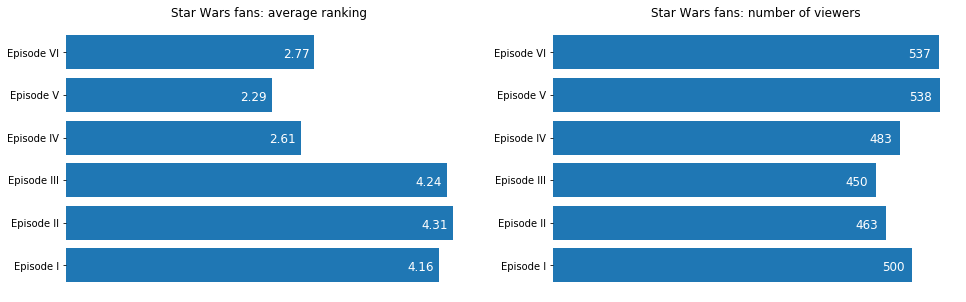



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.740331
Number of Viewers        -0.740331           1.000000


Star Wars fans  opinion of characters:
Opinion-Han Solo                3.84
Opinion-Yoda                    3.78
Opinion-Obi Wan Kenobi          3.77
Opinion-Luke Skywalker          3.70
Opinion-Princess Leia Organa    3.69
Opinion-R2 D2                   3.68
Opinion-C-3P0                   3.52
Opinion-Anakin Skywalker        2.83
Opinion-Lando Calrissian        2.76
Opinion-Darth Vader             2.69
Opinion-Padme Amidala           2.68
Opinion-Boba Fett               2.45
Opinion-Emperor Palpatine       2.10
Opinion-Jar Jar Binks           1.68
dtype: float64


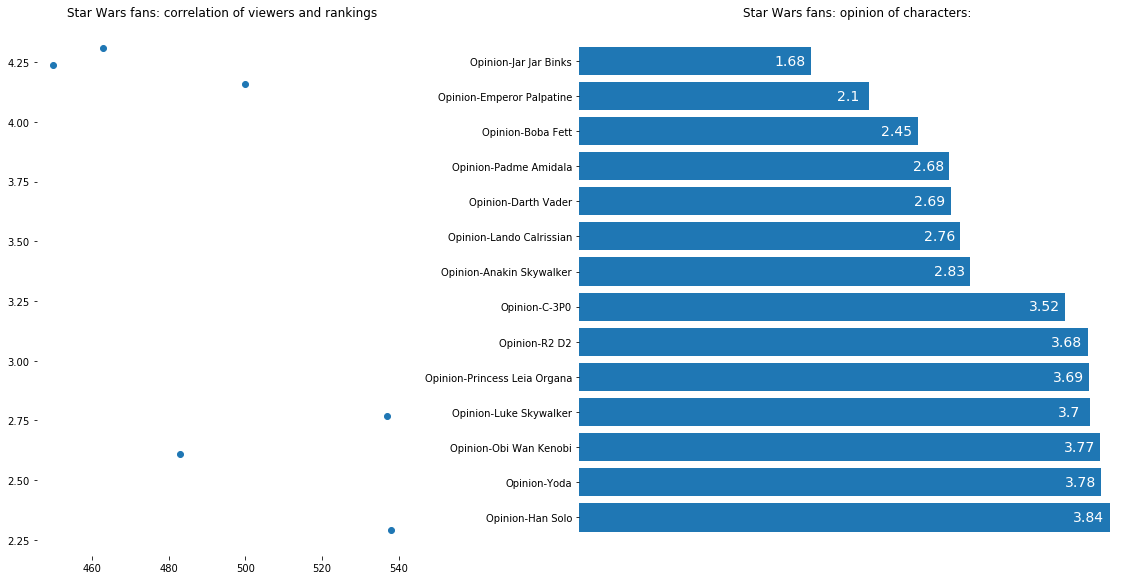

In [36]:
analyze('Star Wars fans')

Non Star Wars fans, sample size:  634


             Average Ranking  Number of Viewers
Episode I               2.72                173
Episode II              3.33                108
Episode III             3.77                100
Episode IV              2.79                124
Episode V               2.32                220
Episode VI              2.66                201


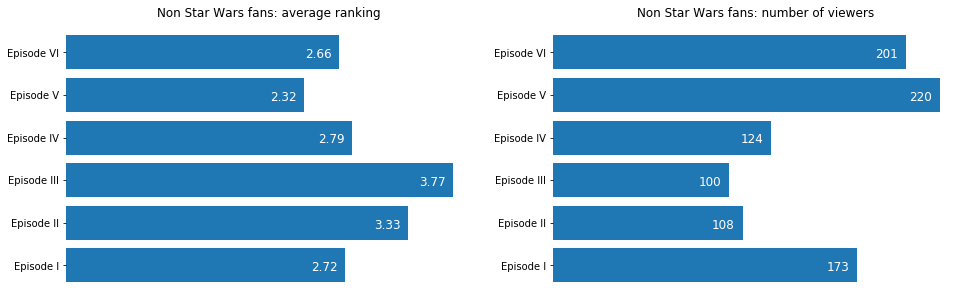



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.876445
Number of Viewers        -0.876445           1.000000


Non Star Wars fans  opinion of characters:
Opinion-Obi Wan Kenobi          3.35
Opinion-R2 D2                   3.34
Opinion-Luke Skywalker          3.34
Opinion-Yoda                    3.33
Opinion-Han Solo                3.33
Opinion-Princess Leia Organa    3.29
Opinion-C-3P0                   3.17
Opinion-Anakin Skywalker        2.64
Opinion-Padme Amidala           2.39
Opinion-Lando Calrissian        2.28
Opinion-Boba Fett               2.12
Opinion-Darth Vader             2.07
Opinion-Jar Jar Binks           2.02
Opinion-Emperor Palpatine       1.99
dtype: float64


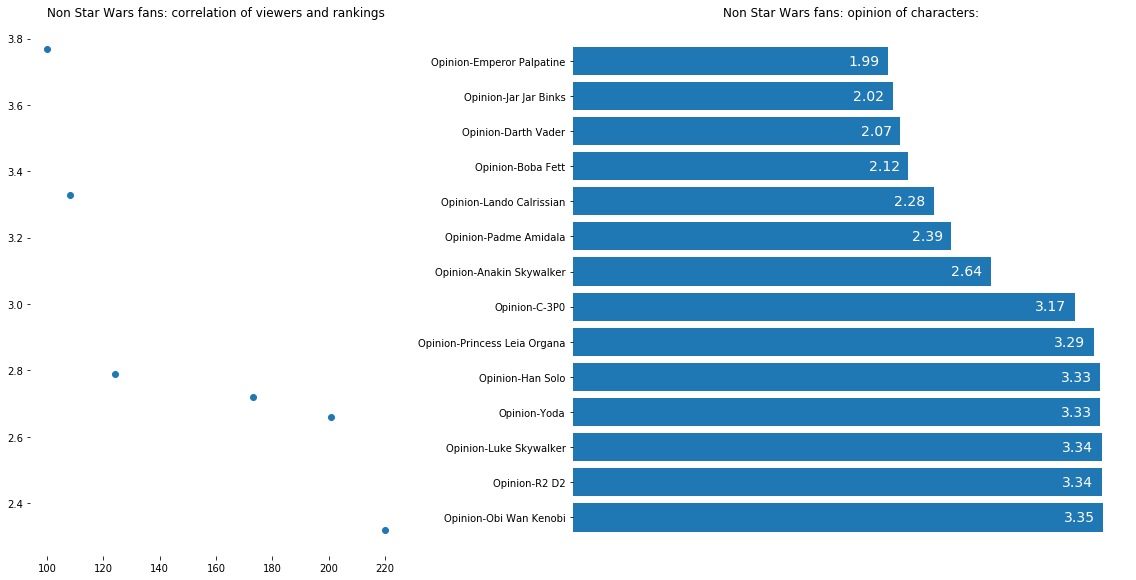

In [37]:
analyze('Non Star Wars fans')

After analyzing Star Wars fans and non-fans, these are some interesting findings:
* Fans rank episode V at (2.29), nearly identical to non fans (2.32)
* Non fans rank episode I at (2.72). Fans rank episode I at (4.16) 
* Almost all fans have seen each episode with little variation between episodes
* At most about a third of non fans have seen any given Star Wars movie, episode V being the most watched
* Han Solo ranks 1st for fans (3.84), and 5th for non fans (3.33) in opinion score

[To Navigation Menu](#Navigation)

## Analyze Star Trek fans and non-fans

Star Trek fans, sample size:  427


             Average Ranking  Number of Viewers
Episode I               3.98                364
Episode II              4.24                336
Episode III             4.22                322
Episode IV              2.68                342
Episode V               2.33                397
Episode VI              2.73                396


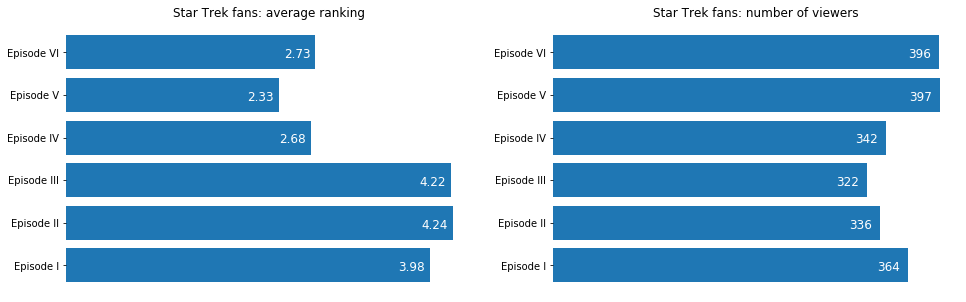



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.721008
Number of Viewers        -0.721008           1.000000


Star Trek fans  opinion of characters:
Opinion-Han Solo                3.79
Opinion-Yoda                    3.74
Opinion-Obi Wan Kenobi          3.73
Opinion-Princess Leia Organa    3.66
Opinion-Luke Skywalker          3.66
Opinion-R2 D2                   3.65
Opinion-C-3P0                   3.49
Opinion-Anakin Skywalker        2.79
Opinion-Lando Calrissian        2.69
Opinion-Padme Amidala           2.68
Opinion-Darth Vader             2.58
Opinion-Boba Fett               2.31
Opinion-Emperor Palpatine       1.99
Opinion-Jar Jar Binks           1.72
dtype: float64


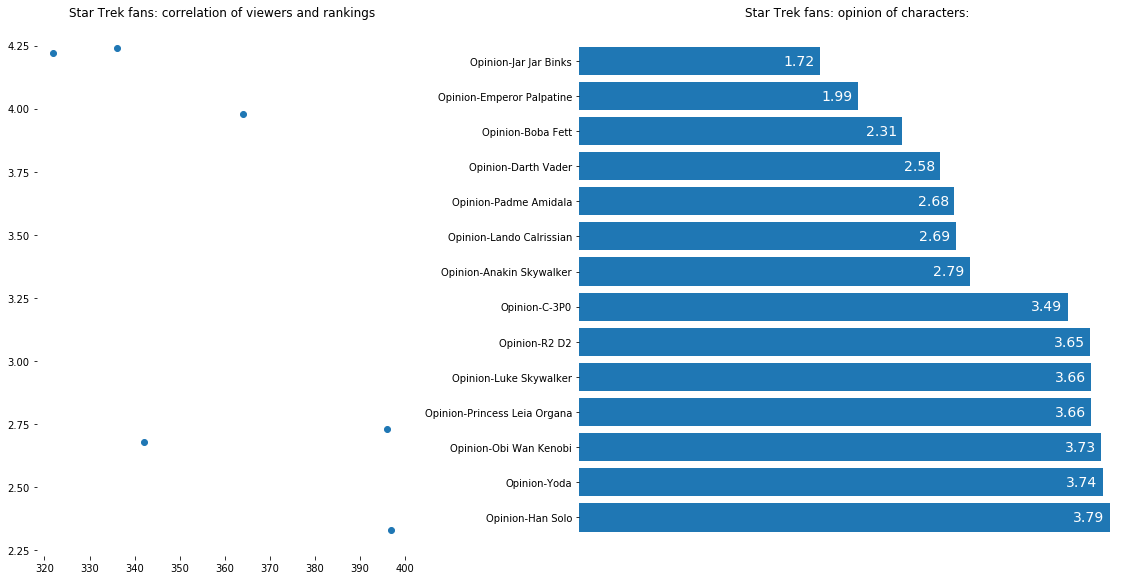

In [38]:
analyze('Star Trek fans')

Non Star Trek fans, sample size:  641


             Average Ranking  Number of Viewers
Episode I               3.54                301
Episode II              3.96                228
Episode III             4.07                221
Episode IV              2.60                258
Episode V               2.28                353
Episode VI              2.74                334


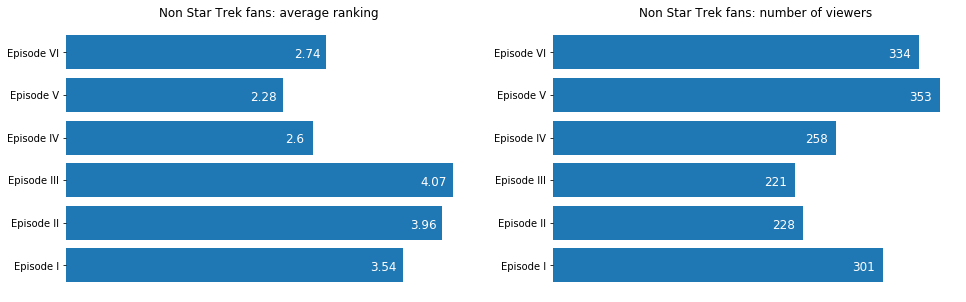



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.775217
Number of Viewers        -0.775217           1.000000


Non Star Trek fans  opinion of characters:
Opinion-Han Solo                3.55
Opinion-Obi Wan Kenobi          3.53
Opinion-Yoda                    3.51
Opinion-R2 D2                   3.49
Opinion-Luke Skywalker          3.49
Opinion-Princess Leia Organa    3.44
Opinion-C-3P0                   3.30
Opinion-Anakin Skywalker        2.75
Opinion-Lando Calrissian        2.57
Opinion-Padme Amidala           2.51
Opinion-Boba Fett               2.41
Opinion-Darth Vader             2.37
Opinion-Emperor Palpatine       2.16
Opinion-Jar Jar Binks           1.83
dtype: float64


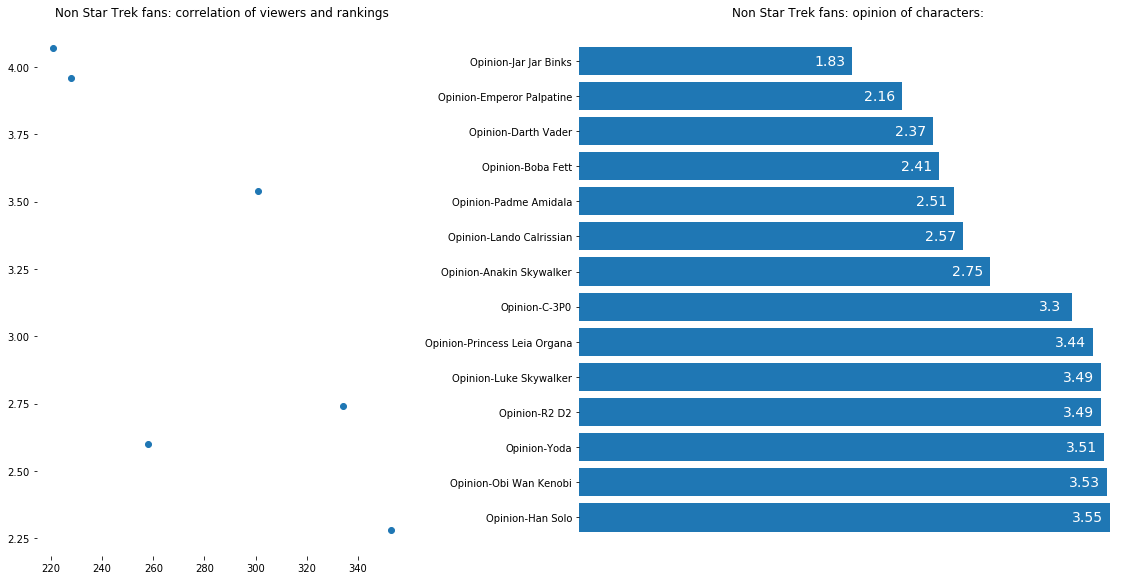

In [39]:
analyze('Non Star Trek fans')

After analyzing Star Trek fans and non-fans, these are some interesting findings:
* Star Trek fans rank episode V a little lower (2.33) than non fans (2.28)

[To Navigation Menu](#Navigation)

## Analyze Males and Females

Males, sample size:  497


             Average Ranking  Number of Viewers
Episode I               4.10                361
Episode II              4.27                323
Episode III             4.14                317
Episode IV              2.55                342
Episode V               2.30                392
Episode VI              2.76                387


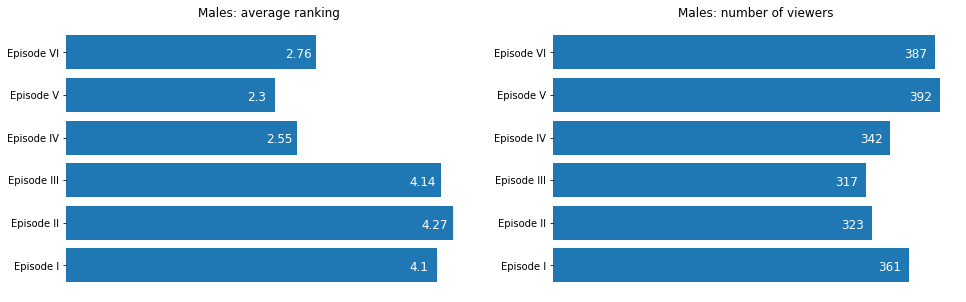



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.708289
Number of Viewers        -0.708289           1.000000


Males  opinion of characters:
Opinion-Han Solo                3.68
Opinion-Obi Wan Kenobi          3.63
Opinion-Yoda                    3.58
Opinion-Luke Skywalker          3.56
Opinion-Princess Leia Organa    3.53
Opinion-R2 D2                   3.44
Opinion-C-3P0                   3.24
Opinion-Darth Vader             2.75
Opinion-Lando Calrissian        2.65
Opinion-Anakin Skywalker        2.65
Opinion-Padme Amidala           2.53
Opinion-Boba Fett               2.49
Opinion-Emperor Palpatine       2.21
Opinion-Jar Jar Binks           1.55
dtype: float64


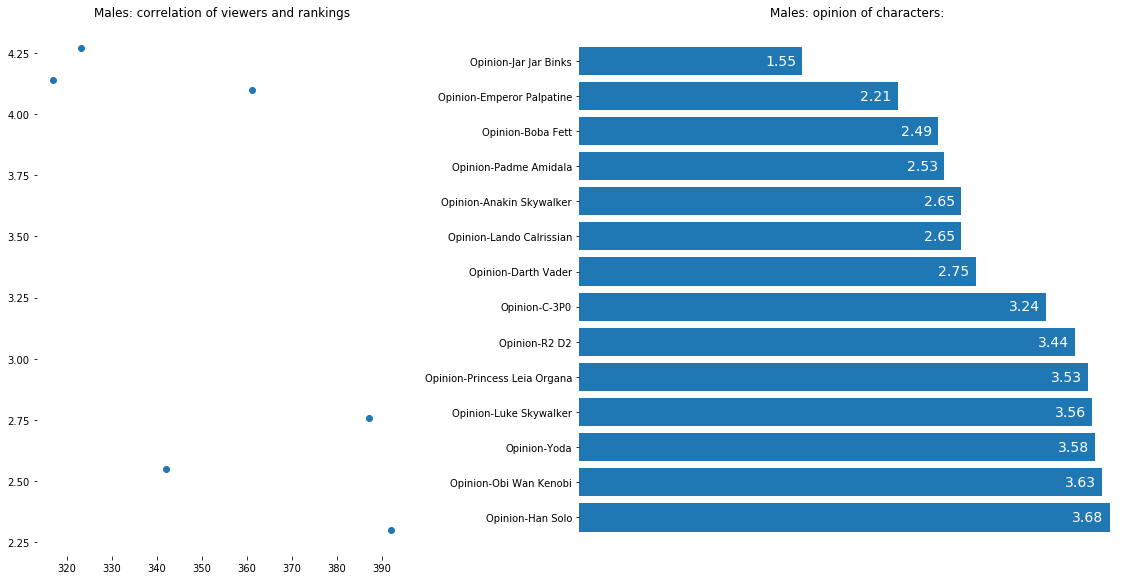

In [40]:
analyze('Males')

Females, sample size:  549


             Average Ranking  Number of Viewers
Episode I               3.42                298
Episode II              3.93                237
Episode III             4.18                222
Episode IV              2.76                255
Episode V               2.31                353
Episode VI              2.70                338


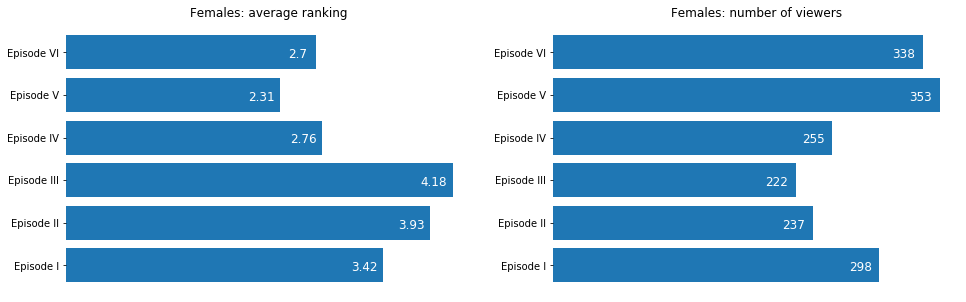



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.827946
Number of Viewers        -0.827946           1.000000


Females  opinion of characters:
Opinion-R2 D2                   3.71
Opinion-Yoda                    3.70
Opinion-Han Solo                3.68
Opinion-Obi Wan Kenobi          3.64
Opinion-Luke Skywalker          3.61
Opinion-Princess Leia Organa    3.59
Opinion-C-3P0                   3.58
Opinion-Anakin Skywalker        2.89
Opinion-Padme Amidala           2.69
Opinion-Lando Calrissian        2.61
Opinion-Darth Vader             2.20
Opinion-Boba Fett               2.18
Opinion-Jar Jar Binks           2.02
Opinion-Emperor Palpatine       1.87
dtype: float64


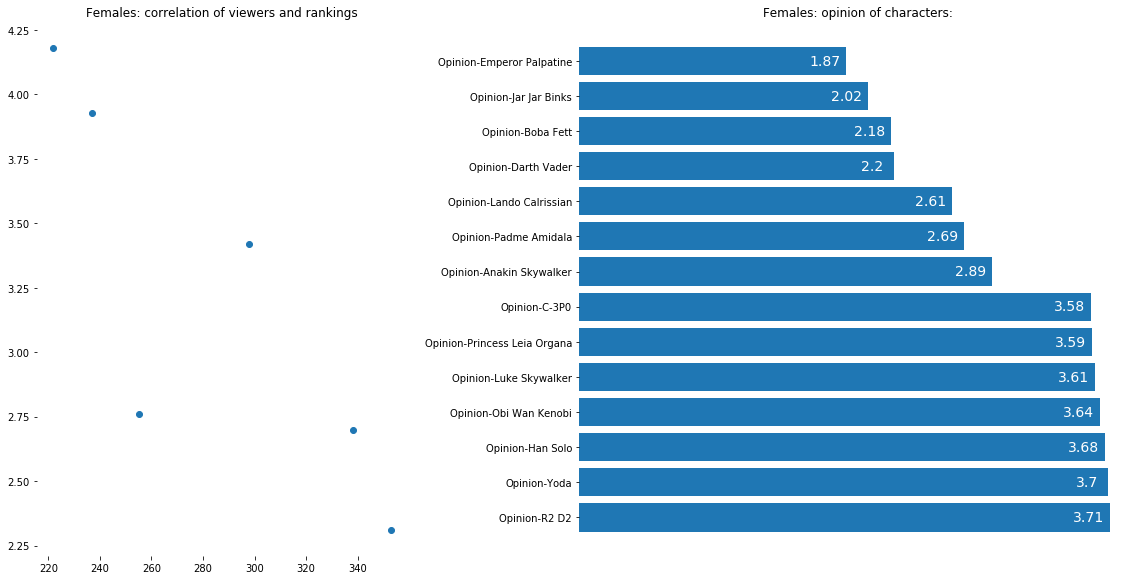

In [41]:
analyze('Females')

After analyzing males and females, these are some interesting findings:
* Males rank episode V similarly (2.3) to females (2.31).
* Higher percentage of males watched the movies as opposed to females
* Males show a 71% correlation of rankings and viewers as opposed to females at 83%
* Females' favorite character seems to be R2D2 according to opinion scores. Males rate him 6th
* Males have a better opinion of Darth Vader than Padme. For females, it's the opposite

[To Navigation Menu](#Navigation)

## Analyze by Age

My goal here specifically is to be selective and compare the most distant age brackets for brevity. Some age brackets are omitted.

Under 30 Years of Age, sample size:  218


             Average Ranking  Number of Viewers
Episode I               4.16                160
Episode II              4.12                148
Episode III             3.83                145
Episode IV              2.66                152
Episode V               2.48                160
Episode VI              2.86                160


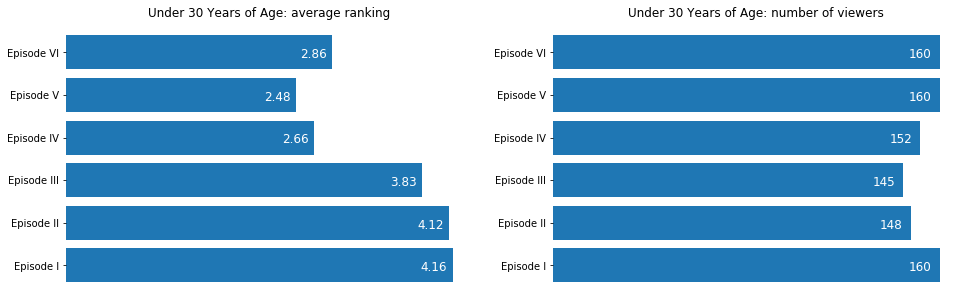



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.417872
Number of Viewers        -0.417872           1.000000


Under 30 Years of Age  opinion of characters:
Opinion-Yoda                    3.60
Opinion-Obi Wan Kenobi          3.56
Opinion-Han Solo                3.55
Opinion-R2 D2                   3.49
Opinion-Princess Leia Organa    3.39
Opinion-Luke Skywalker          3.36
Opinion-C-3P0                   3.18
Opinion-Darth Vader             2.67
Opinion-Padme Amidala           2.63
Opinion-Lando Calrissian        2.59
Opinion-Anakin Skywalker        2.58
Opinion-Boba Fett               2.52
Opinion-Emperor Palpatine       2.01
Opinion-Jar Jar Binks           1.65
dtype: float64


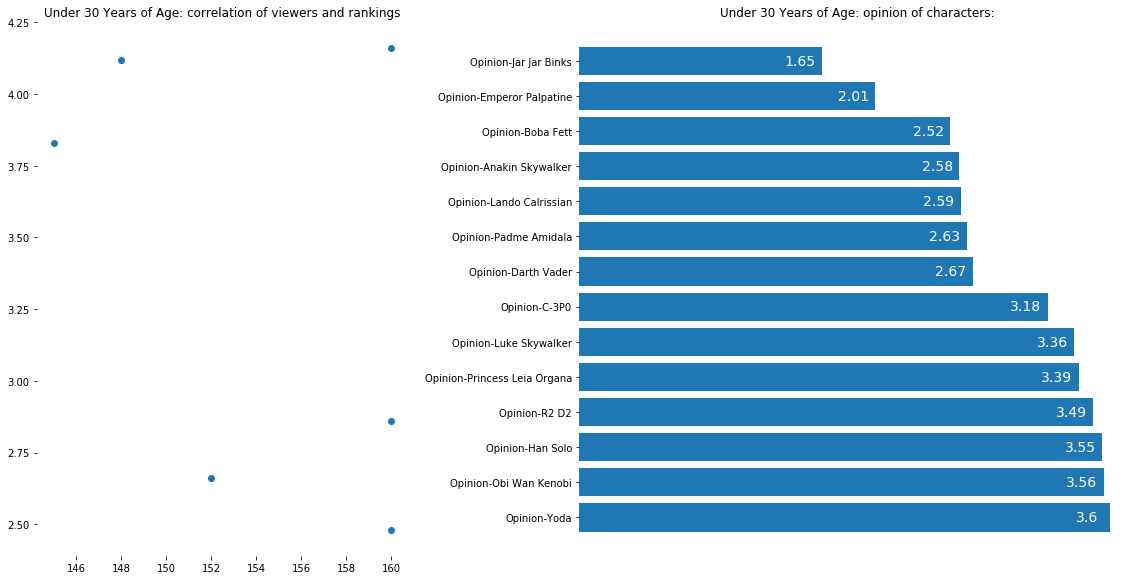

In [42]:
analyze('Under 30 Years of Age')

Over 60 Years of Age, sample size:  269


             Average Ranking  Number of Viewers
Episode I               2.80                143
Episode II              3.62                106
Episode III             4.14                100
Episode IV              2.99                104
Episode V               2.45                168
Episode VI              2.85                158


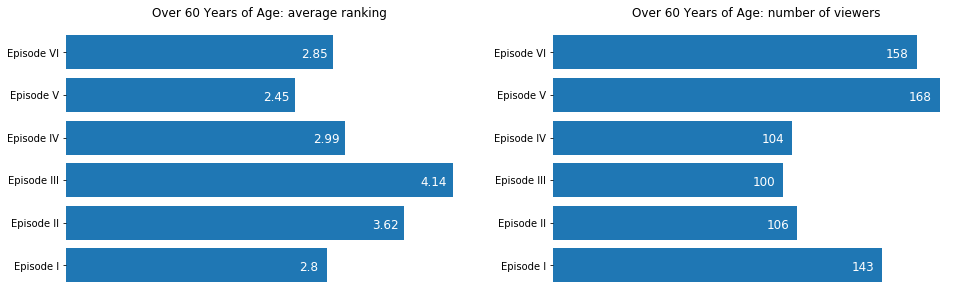



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.815436
Number of Viewers        -0.815436           1.000000


Over 60 Years of Age  opinion of characters:
Opinion-Han Solo                3.76
Opinion-Luke Skywalker          3.74
Opinion-Obi Wan Kenobi          3.73
Opinion-Princess Leia Organa    3.66
Opinion-Yoda                    3.62
Opinion-R2 D2                   3.60
Opinion-C-3P0                   3.57
Opinion-Anakin Skywalker        3.08
Opinion-Lando Calrissian        2.75
Opinion-Padme Amidala           2.57
Opinion-Darth Vader             2.33
Opinion-Jar Jar Binks           2.16
Opinion-Boba Fett               2.15
Opinion-Emperor Palpatine       2.09
dtype: float64


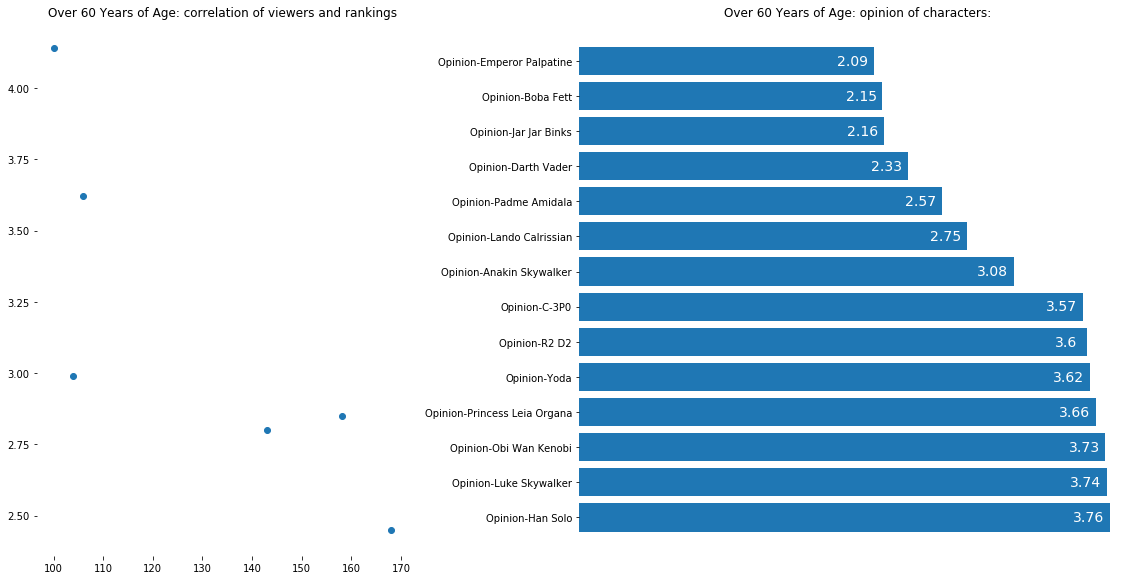

In [43]:
analyze('Over 60 Years of Age')

After analyzing young and old survey takers, these are some interesting findings:
* People under 30 rank episode V at (2.48), similar to people over 60 (2.45).
* Higher percentage of people under 30 have watched the movies as opposed to people over 60.
* Number of viewers for each episode shows little variation for people under 30.
* People over 60 rank episode I at (2.8), and it's the 2nd favorite episode for this age group. People under 30 rank episode I at (4.16) and it's their least favorite episode.
* People under 30 show a 42% correlation of rankings and viewers as opposed to people over 60 at 82%
* Yoda has the highest opinion score for people under 30.
* Not a single character is viewed by people over 60 below neutral (2)

[To Navigation Menu](#Navigation)

## Analyze by Income Level

Under $25,000 Income, sample size:  138


             Average Ranking  Number of Viewers
Episode I               3.97                 75
Episode II              3.97                 66
Episode III             3.80                 64
Episode IV              2.63                 73
Episode V               2.60                 91
Episode VI              2.93                 86


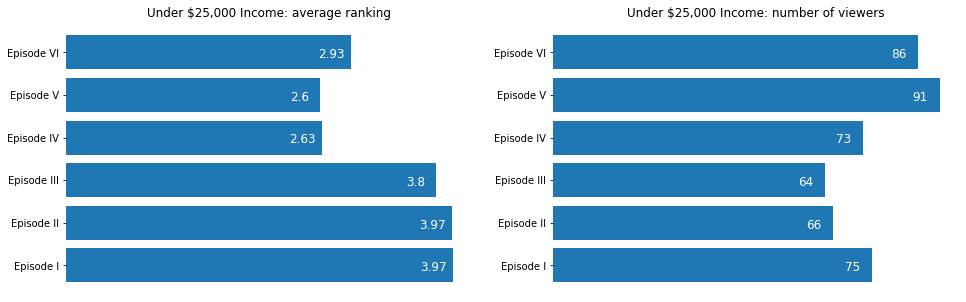



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.712255
Number of Viewers        -0.712255           1.000000


Under $25,000 Income  opinion of characters:
Opinion-Yoda                    3.61
Opinion-Han Solo                3.60
Opinion-R2 D2                   3.50
Opinion-Obi Wan Kenobi          3.47
Opinion-Luke Skywalker          3.39
Opinion-Princess Leia Organa    3.31
Opinion-C-3P0                   3.25
Opinion-Darth Vader             2.52
Opinion-Anakin Skywalker        2.48
Opinion-Lando Calrissian        2.47
Opinion-Padme Amidala           2.42
Opinion-Boba Fett               2.26
Opinion-Emperor Palpatine       1.91
Opinion-Jar Jar Binks           1.63
dtype: float64


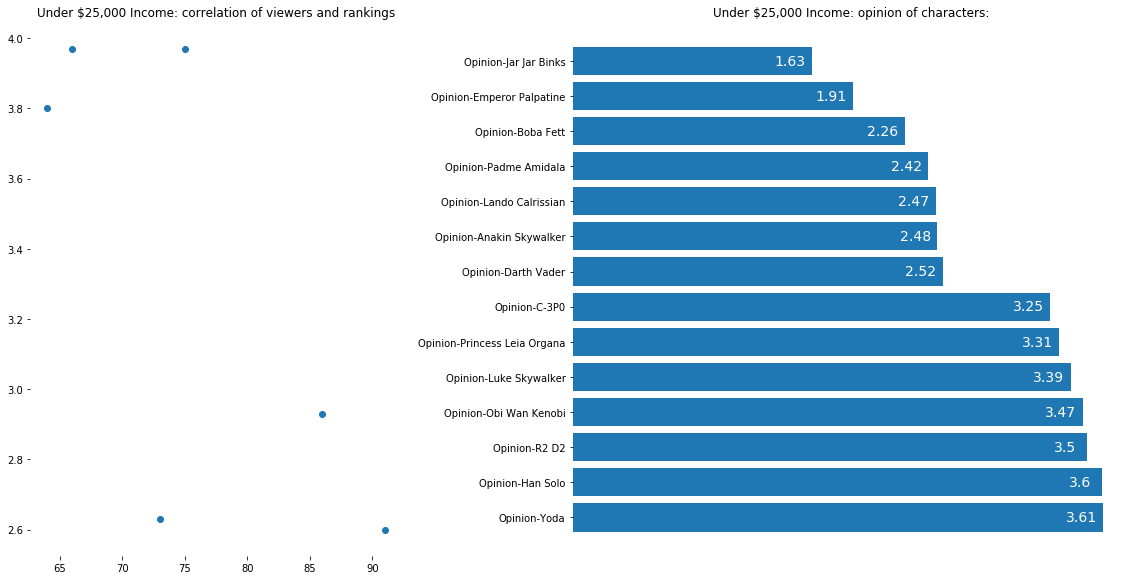

In [44]:
analyze('Under $25,000 Income')

Over $150,000 Income, sample size:  95


             Average Ranking  Number of Viewers
Episode I               3.76                 68
Episode II              4.46                 54
Episode III             4.35                 54
Episode IV              2.44                 61
Episode V               2.27                 71
Episode VI              2.86                 71


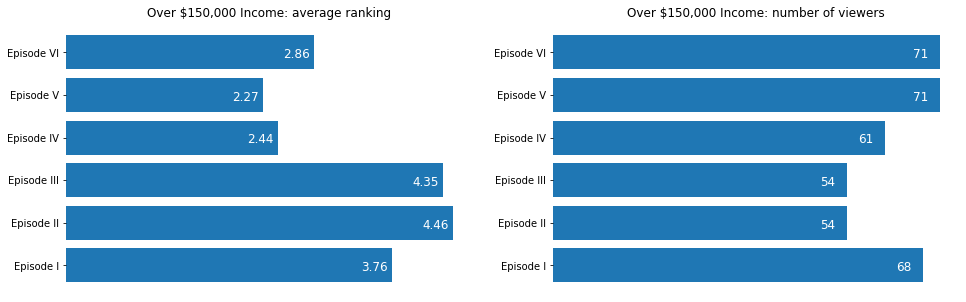



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.720254
Number of Viewers        -0.720254           1.000000


Over $150,000 Income  opinion of characters:
Opinion-Yoda                    3.80
Opinion-Obi Wan Kenobi          3.80
Opinion-Han Solo                3.79
Opinion-Luke Skywalker          3.71
Opinion-R2 D2                   3.67
Opinion-Princess Leia Organa    3.65
Opinion-C-3P0                   3.42
Opinion-Anakin Skywalker        2.75
Opinion-Lando Calrissian        2.56
Opinion-Padme Amidala           2.55
Opinion-Darth Vader             2.45
Opinion-Boba Fett               2.33
Opinion-Emperor Palpatine       2.11
Opinion-Jar Jar Binks           1.52
dtype: float64


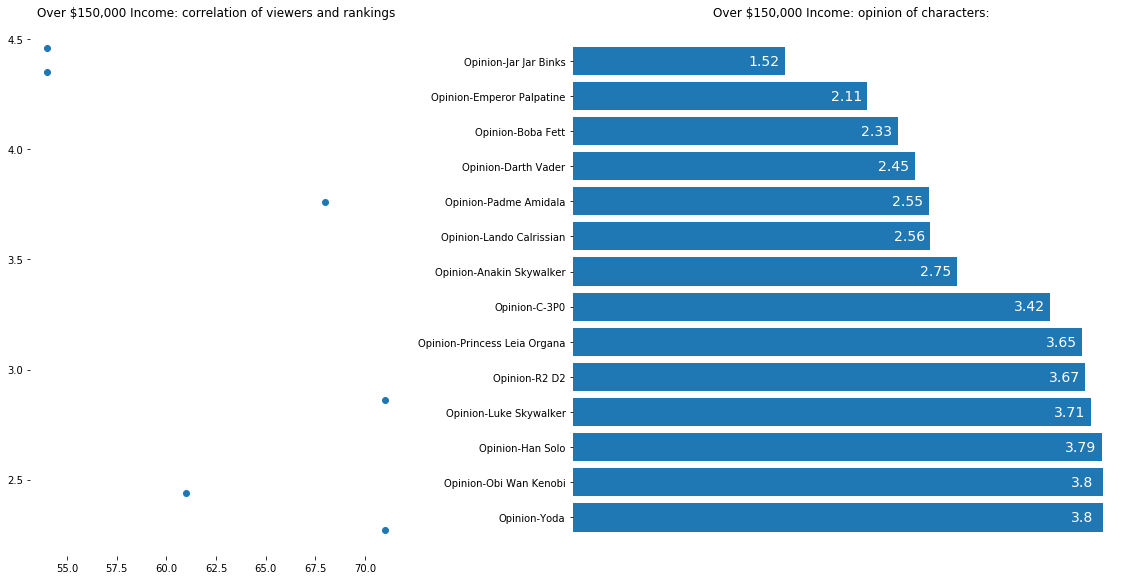

In [45]:
analyze('Over $150,000 Income')

After analyzing people with income under 25,000 USD and over 150,000 USD, these are some interesting findings:
* People with income under 25,000 USD rank episode V at (2.6)
* People with income over 150,000 USD rank episode V at (2.27)

[To Navigation Menu](#Navigation)

## Appendix

See what happens if we split the data on whether Episode V was actually seen. This highlights the problem with being able to rank movies without seeing them

In [46]:
seen_ep_5 = star_wars_copy[star_wars_copy['Seen Episode V The Empire Strikes Back'] == True]
not_seen_ep_5 = star_wars_copy[star_wars_copy['Seen Episode V The Empire Strikes Back'] == False]

dataframes['Seen Ep V'] = seen_ep_5
dataframes['Did Not See Ep V'] = not_seen_ep_5

### Analyze Seen Episode V vs Not Seen Episode V

Seen Ep V, sample size:  758


             Average Ranking  Number of Viewers
Episode I               3.94                613
Episode II              4.26                539
Episode III             4.45                527
Episode IV              3.20                597
Episode V               2.30                758
Episode VI              2.85                723


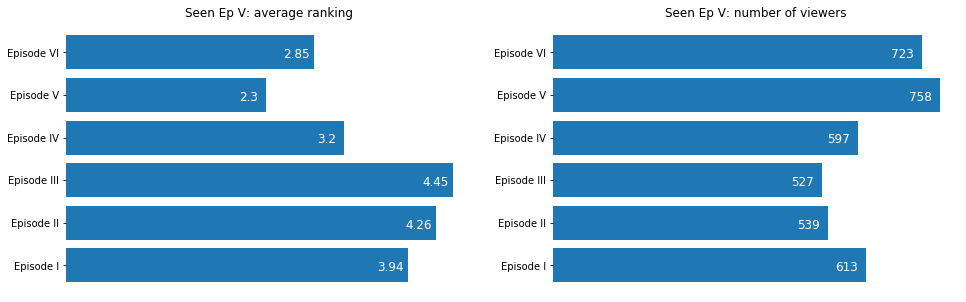



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.935125
Number of Viewers        -0.935125           1.000000


Seen Ep V  opinion of characters:
Opinion-Han Solo                3.73
Opinion-Yoda                    3.67
Opinion-Obi Wan Kenobi          3.67
Opinion-Luke Skywalker          3.61
Opinion-R2 D2                   3.60
Opinion-Princess Leia Organa    3.60
Opinion-C-3P0                   3.43
Opinion-Anakin Skywalker        2.78
Opinion-Lando Calrissian        2.67
Opinion-Padme Amidala           2.63
Opinion-Darth Vader             2.52
Opinion-Boba Fett               2.36
Opinion-Emperor Palpatine       2.06
Opinion-Jar Jar Binks           1.74
dtype: float64


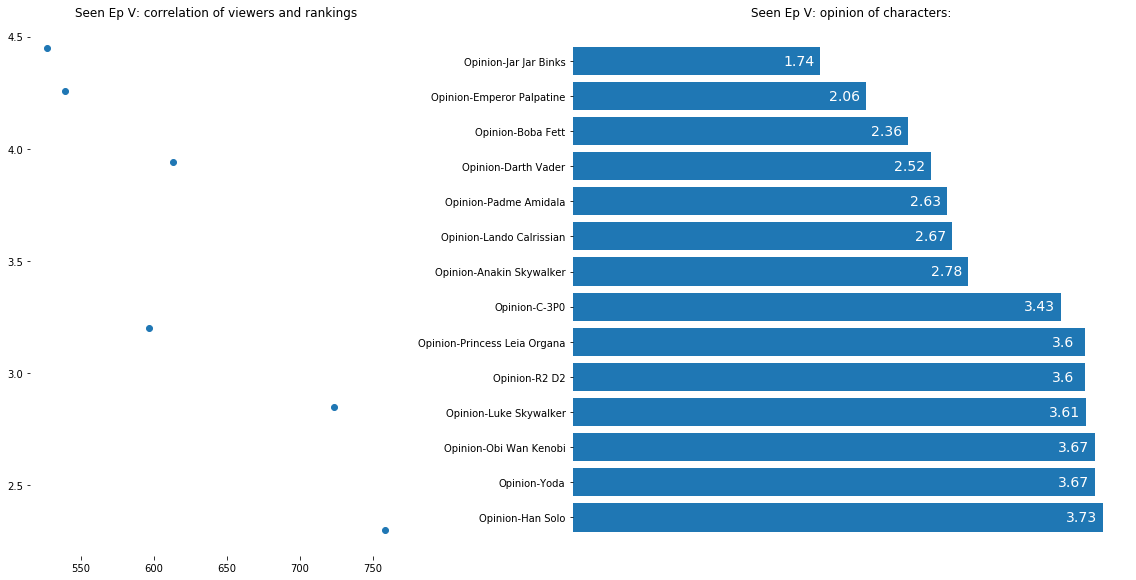

In [47]:
analyze('Seen Ep V')

Did Not See Ep V, sample size:  428


             Average Ranking  Number of Viewers
Episode I               1.74                 60
Episode II              2.44                 32
Episode III             3.26                 23
Episode IV              4.01                 10
Episode V               4.59                  0
Episode VI              4.96                 15


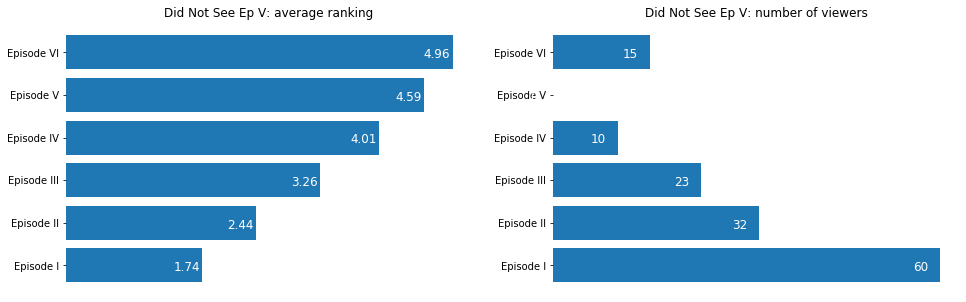



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.895426
Number of Viewers        -0.895426           1.000000


Did Not See Ep V  opinion of characters:
Opinion-Luke Skywalker          3.27
Opinion-R2 D2                   3.26
Opinion-Obi Wan Kenobi          3.25
Opinion-Yoda                    3.20
Opinion-C-3P0                   3.12
Opinion-Princess Leia Organa    3.10
Opinion-Han Solo                3.07
Opinion-Anakin Skywalker        2.71
Opinion-Padme Amidala           2.29
Opinion-Boba Fett               2.28
Opinion-Jar Jar Binks           2.27
Opinion-Emperor Palpatine       2.25
Opinion-Lando Calrissian        2.20
Opinion-Darth Vader             2.06
dtype: float64


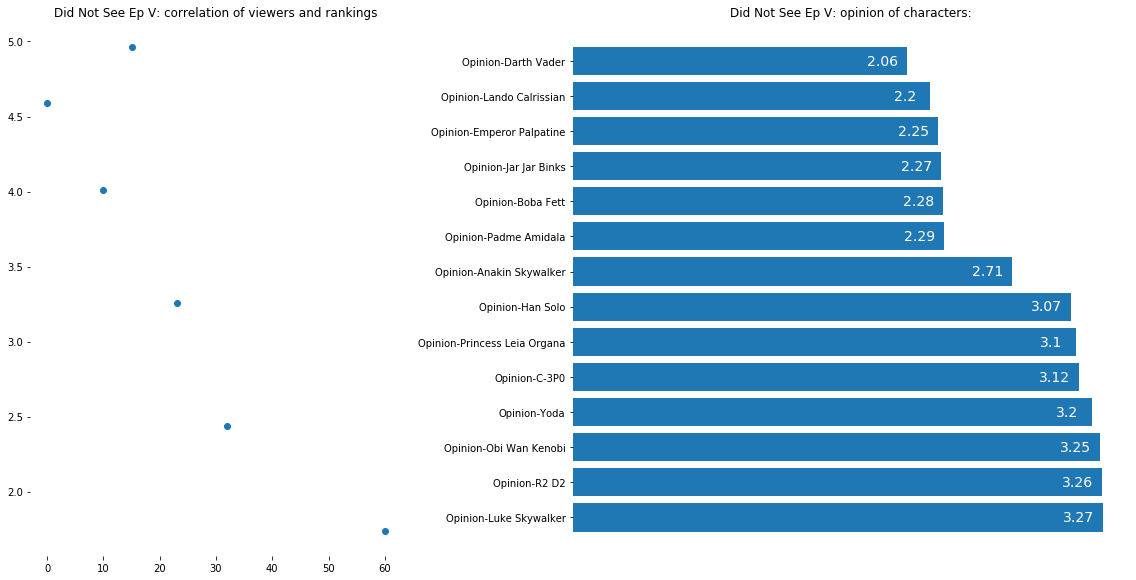

In [48]:
analyze('Did Not See Ep V')

This shows some problems:
* 428 people who did not see Episode V ranked movies in the same order as their titles indicate! This does not compare to any of our previous analysis and seems to indicate a flaw in survey design.
* People who did not see Episode V claim they have a better opinion of Jar Jar and Empreror Palpatine than Lando, which also seems suspect.

[To Navigation Menu](#Navigation)

## Conclusion

I learned that in general, the sequels are ranked higher than the prequels. This holds true if we slice the data by age, gender, income level, and fandom, with only minor differences between groups. It must also be said that the survey design seems to have flaws, which introduced some questionable data into the dataset.